# 1. ultralytics 대신 Roboflow로 추론하는 방법

Roboflow는 데이터셋 레이블링 기능만 제공하는 게 아니나

깃헙처럼 5만개가 넘는 데이터셋, 모델을 공유하고 있으며

(ultralytics보다 강력한) 호스팅 추론기능을 제공합니다.

아래는 roboflow에서 제공하는 inference 모듈을 사용해서

간단한 추론을 진행하는 방법입니다.

또한 supervision이라는 cv2의 추상화 모듈을 사용해보고 있는데요.

(내부의 코드는 cv2로 만들어져 있다는 뜻입니다.)

익숙해지시기만 하면 supervision의 인터페이스가 

훨씬 쉽게 느껴지겠지만, cv2의 모든 기능을 제공하고 있지는 않으므로

sv가 cv2를 완벽하게 대체하기는 어렵습니다.


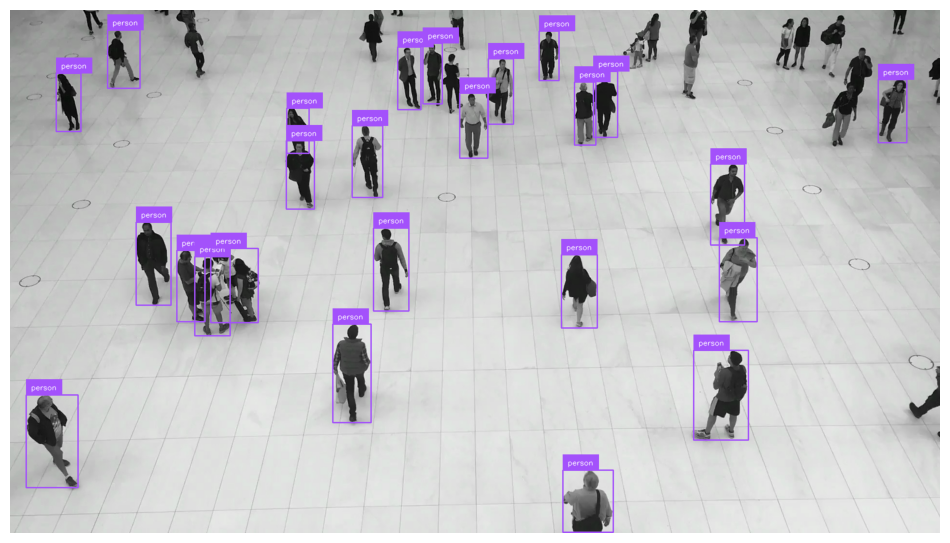

In [3]:
from inference import get_roboflow_model
import supervision as sv
import cv2

image_file = "./test/people-walking.jpg"
image = cv2.imread(image_file)

# load a pre-trained yolov8n model
model = get_roboflow_model(model_id="yolov8x-640")

# 아래 infer 안에 파일경로, url, 넘파이array 등 다 넣을 수 있음
results = model.infer(image_file)

# load the results into the supervision Detections api
detections = sv.Detections.from_inference(results[0].dict(by_alias=True, exclude_none=True))

# create supervision annotators
bounding_box_annotator = sv.BoundingBoxAnnotator()
label_annotator = sv.LabelAnnotator()

# annotate the image with our inference results
annotated_image = bounding_box_annotator.annotate(
    scene=image, detections=detections)
annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections)

# display the image
sv.plot_image(annotated_image)  # 간편하죠?

# 2. roboflow에서 학습한 커스텀 모델로 추론하는 방법

roboflow에서도 소량의 데이터에 한해

무료로 학습도 가능하고, 온라인 추론 가능한 API도 제공합니다.  

In [32]:
# 학습데이터 소스 : https://www.youtube.com/watch?v=gcmVNRabwa4
# 테스트이미지 출처 : https://www.aquariumofpacific.org/exhibits/penguin_habitat

![](https://i.ibb.co/gZLW254/217.png)

In [0]:
%pip install roboflow

loading Roboflow workspace...
loading Roboflow project...


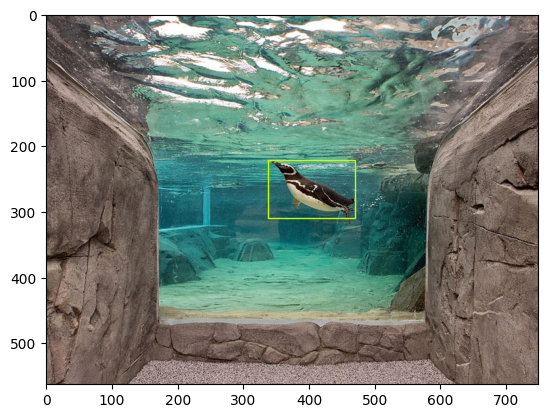

{'predictions': [{'x': 404,
   'y': 265,
   'width': 132,
   'height': 89,
   'confidence': 0.8177201151847839,
   'class': 'penguin',
   'class_id': 0,
   'detection_id': 'd4871f08-47d1-4970-89ab-1260d47f7dfd',
   'image_path': './test/p_on_water.jpg',
   'prediction_type': 'ObjectDetectionModel'}],
 'image': {'width': '750', 'height': '563'}}

In [31]:
import roboflow

rf = roboflow.Roboflow(api_key="un7kANfGUhngOf2sYCk3")

project = rf.workspace().project("penguin-detection-qyh4k")
model = project.version("1").model

# 신뢰도 50% 이상의 객체만 탐지하고 싶다면
# 아래 옵션을 추가하시면 됩니다.
model.confidence = 50

# predict on a local image
prediction = model.predict("./test/p_on_water.jpg")

prediction.plot()

# 3. roboflow로 학습할 때의 장단점?

그런데 roboflow의 엄청난 간편함과 대비되는

강력한 단점이 하나 있는데,

아~주 비싸다는 점입니다.(최소 249달러/월)

그래서 대부분 데이터셋만 roboflow를 활용하고

학습은 로컬이나 코랩에서 돌리게 됩니다.

그 구체적인 방법은 다음 챕터에서 보여드리겠습니다.
